# Viaggio in ascensore
### -- Esperimento sul moto 1D ed analisi dati --

Il movimento di un ascensore è un esempio di moto 1D. Obiettivo di questo esempio è quello di studiare la posizione, la velocità e l'accelerazione in funzione del tempo.

![](img/ascensore.jpg)


#### Descrizione

La posizione dell'ascensore lungo la direzione verticale può essere registrata tramite una App per smartphone ([phyphox](https://phyphox.org/)). 
L'applicazione misura la pressione atmosferica e calcola le variazioni di quota rispetto alla posizione iniziale, utilizzando un opportuno algoritmo.

1. Si effettua un esperimento, registrando i valori di quota in funzione del tempo
2. I dati vengono memorizzati in un file di testo (Tab separated values) che ha la seguente struttura

Time (s) | Pressure (hPa) | Height (m) | Xxxxxx | Xxxxxxxx 
---------|----------------|------------|--------|----------
1.002612265E0 | 1.013205700E3 | 0.000000000E0| XXXXXX | XXXXXX

3. A noi interessa leggere i dati della prima colonna e della terza colonna, per ottenere una **tabella oraria** del moto che vogliamo studiare, cioè un insieme di dati organizzati nel modo seguente

Time (s) | Height (m) 
---------|----------------
1.002612265E0 | 0.000000000E0

4. Si vuole ottenere innanzitutto una rappresentazione grafica dei dati, basandoci sul modulo [MatPlotLib](https://matplotlib.org/) di Python.
5. Si vogliono analizzare i dati per ottenere i valori di velocità in funzione del tempo.
6. Si vuole rappresentare graficamente l'andamento della velocità in funzione del tempo.
7. Salvare i grafici e i risultati dell'analisi dati in un file.
8. Discutere i risultati
9. Calcolare i valori dell'accelerazione in funzione del tempo e confrontarli con i valori di accelerazione misurati simultaneamente da un altro sensore (accelerometro) con la stessa App.

##### 1. Esperimento
Installare sullo smartphone l'applicazione [phyphox](phyphox.org) e fra i menu disponibili scegliere sotto la voce **Vita quotidiana** l'esperimento **Ascensore**. Tasto **play** per iniziare la misura.

![](img/phyphox.png)

-- N.B. Servirà un ascensore

&nbsp;

##### 2. Salvare i dati
Dal tasto con i tre puntini verticali in alto a destro dello schermo dello smartphone scegliere **Esporta dati** e scegliere il formato preferito dei dati: per questo esempio scegliamo **CSV(Tabulator, decimal point)**
Una volta salvato il file dati si può trasferire dallo smartphone al computer, per i passi successivi dell'esperimento.

Dati disponibili |
-----------------|
Trip01-Height.csv
Trip02-Height.csv
Trip03-Height.csv

##### 3.-4.  Leggere i dati e  rappresentarli in un grafico
Per leggere i dati e rappresentarli in grafico utilizziamo i moduli [numpy](nupmy.org) e [matplotlib]() di Python.
Il codice che utilizziamo è basato su esempi descritti in [1](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html), [2](http://stacks.iop.org/PhysED/55/033006/mmedia) e [3](https://github.com/POSS-UniMe/RCwithRPi).

Per la lettura del file di testo utilizziamo **loadtxt** con l'opzione **skiprows**, che permette di saltare le prime $n$ righe, e con l'opzione **usecols**, che permette di selezionare le colonne che vogliamo leggere (rif. [4](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html))

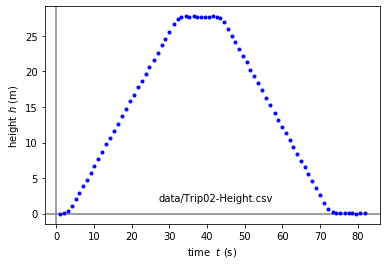

In [134]:
import numpy as np
import matplotlib.pyplot as plt

inputDataFile='data/Trip02-Height.csv'

# read data from file
t, x = np.loadtxt(inputDataFile, skiprows=1, usecols=(0,2), unpack = True)

# plot of the experimental data
plt.plot(t, x, 'o', color='blue', markersize = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)

#plt.savefig('height_vs_time.pdf')
plt.show()

##### 5. Calcolare la velocità
La velocità media in ciascun intervallo di tempo del tipo $[t_1, t_2]$ viene calcolata in base alla semplice relazione
$$ v = \dfrac{\Delta x}{\Delta t}$$
ed associamo questo valore $v_1$ al tempo $t'_1$ ottenuto come valore medio fra $t_1$ e $t_2$.

Aggiungiamo alcune righe di codice allo script precedente.

Per calcolare gli spostamenti $\Delta x$ e la durata degli intervalli di tempo $\Delta t$ fra due misure successive usiamo la funzione **numpy.diff()**

In [136]:
speedDataFile='data/Trip02-Speed.csv'
np.set_printoptions(precision=20)
delta_t = np.diff(t)
delta_x = np.diff(x)
v = delta_x / delta_t
t_prime = t[:-1] + (delta_t/2)
np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

##### 6. Grafico della velocità in funzione del tempo
Usiamo la libreria Matplotlib, come in precedenza.

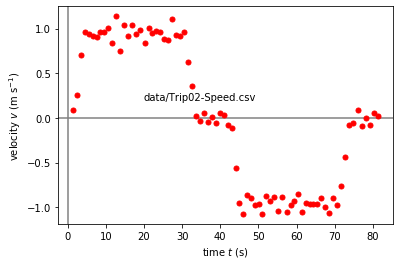

In [137]:
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)
plt.draw()
plt.show()

##### 7. Grafico cumulativo di quota e velocità
Vogliamo riportare insieme i due grafici precedenti, a scopo di confronto. Come riferimento utilizziamo la documentazione del modulo matplotlib (v.rif.[5](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html))

Text(20, 0.2, 'data/Trip02-Speed.csv')

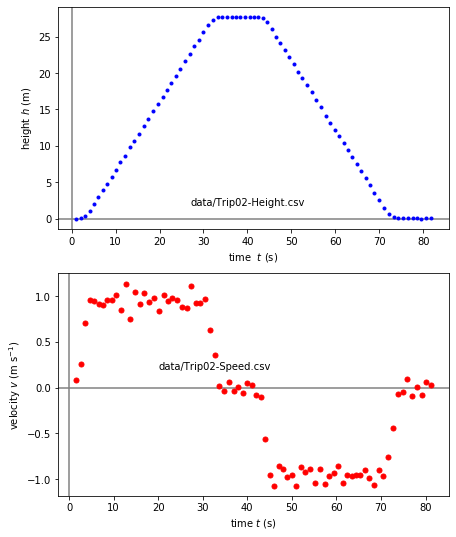

In [138]:
fig = plt.figure(figsize=(7, 9))

plt.subplot(2, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)


plt.subplot(2, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)


##### 8. Analisi dei dati
* ###### 8.1 Inserire un marker nel grafico

In [129]:
np.size(t)

45

In [4]:
import ipywidgets as widgets

sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t)-1), step = 1, value = 0, continuous_update = False)
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t)-1), step = 1, value = 0, continuous_update = False)

def calculate(MarkerOne, MarkerTwo):
        print('Marker One = ',MarkerOne, '      Marker Two = ', MarkerTwo, '\n')
        MarkerOneTime = t[MarkerOne]   
        MarkerTwoTime = t[MarkerTwo]
        print ('Time One', MarkerOneTime, 's', '      Time Two = ', MarkerTwoTime, '\n')
        makeplots(MarkerOne,MarkerTwo)
        t_subset = t[MarkerOne:MarkerTwo]
        x_subset = x[MarkerOne:MarkerTwo]
        
def makeplots(MarkerOne, MarkerTwo):
    fig = plt.figure(figsize=(7, 9))
   # plt.ion()
    plt.subplot(2, 1, 1)
    plt.plot(t, x, 'o', color='blue', markersize = 3)
    plt.plot(t[MarkerOne],x[MarkerOne], 'o', color='red', markersize = 6)
    plt.plot(t[MarkerTwo],x[MarkerTwo], 'o', color='cyan', markersize = 7)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t[MarkerTwo], zorder = -1)
    plt.xlabel('time  $t$ (s)')
    plt.ylabel('height $h$ (m)')
    plt.text(27, 1.8, inputDataFile)


    plt.subplot(2, 1, 2)
    plt.plot(t_prime, v, 'o', color='red', markersize = 5)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t[MarkerTwo], zorder = -1)
    plt.xlabel('time $t$ (s)')
    plt.ylabel('velocity $v$ (m s$^{-1}$)')
    plt.text(20, 0.2, speedDataFile)
        
widgets.interact(calculate, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

NameError: name 'np' is not defined

* ###### 8.2 Fit lineare dei dati di x(t) in un intervallo di tempo scelto

Ipotesi: moto uniforme

Se in un certo intervallo di tempo il moto è uniforme, comunque scelti due istanti di tempo, $t_1$ e $t_2$ in tale intervallo, il rapporto $ (x_2-x_1)/(t_2-t_1) $ è costante ed uguale a $v$. Se fissiamo $t_1$, per un istante $t$ generico dovrà essere

$$ \dfrac{x-x_1}{t-t_1} = v $$

da cui segue

$$ x - x_1 = v (t-t_1)  \hspace{1cm} \text{e quindi} \hspace{1 cm}  x = v t + (x_1 - v t_1) $$

In altri termini, in un intervallo di tempo in cui il moto è uniforme, il grafico di $x$ in funzione del tempo $t$ è lineare, ed è descritto da un'equazione del tipo

$$ x = A t + B $$

I valori dei parametri $A$ e $B$ che corrispondono alla retta che meglio approssima i dati sperimentali si ottengono tramite un metodo che minimizza la somma dei quadrati degli scarti fra i valori teorici ed i valori sperimentali misurati.

**Riferimenti**

Lorena A. Barba, Natalia C. Clementi [GitHub Engineering Computation](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb) \[Linear regression with real data\]

David J. Pine [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting) \[Linear least squares fitting\]

&nbsp;

In [140]:
t_subset = t[sliderMarkerOne.value:sliderMarkerTwo.value]
x_subset = x[sliderMarkerOne.value:sliderMarkerTwo.value]

def LineFit(x,y):
    x_avg = x.mean()
    slope =  (y*(x-x_avg)).sum()/(x*(x-x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

v_est, x_intercept = LineFit(t_subset, x_subset)


print('\n Estimated value of the velocity (from the linear fit)')
print('\n v = {0:0.3} m/s \n'.format(v_est))
#print('$x_intercept$', x_intercept, 'm', '\n')



 Estimated value of the velocity (from the linear fit)

 v = -0.957 m/s 



* ###### 8.3 Confronto grafico fra i dati sperimentali ed il fit lineare

Costruiamo un grafico in cui oltre ai dati sperimentali è riportato anche l'andamento previsto in un certo intervallo di tempo in caso di moto con velocità costante, utilizzando i valori dei parametri calcolati tramite la procedura di **best-fit** della sezione precedente.

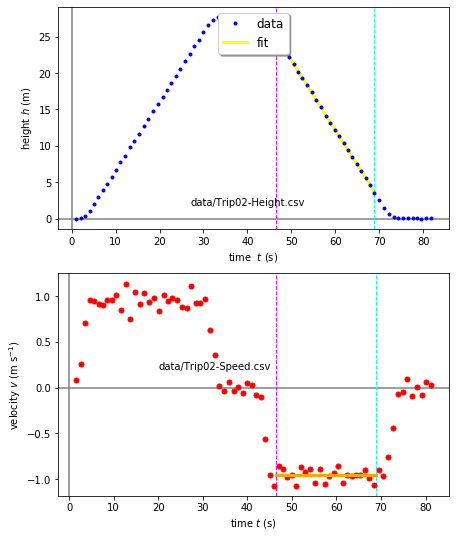

In [141]:
x_fit = v_est * t_subset + x_intercept

#
v_fit = x_fit/x_fit*v_est
#

fig = plt.figure(figsize=(7, 9))
   # plt.ion()
plt.subplot(2, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 3, label = 'data')
plt.plot(t_subset,x_fit, '-', color='yellow', linewidth = 3, zorder = -1, label = 'fit')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1],linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)
plt.legend(loc='upper center', shadow=True, fontsize='large')


plt.subplot(2, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.plot(t_subset,v_fit,'-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1], linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)
plt.savefig('data/height+speed.pdf')

Riferimenti per i grafici

[plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

[linestyle](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

[axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)

[legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)





##### 9. Calcolo dell'accelerazione e confronto con i valori misurati
* ###### 9.1  Calcolo

La situazione è analoga a quella che riguarda il calcolo della velocità media nei vari intervalli di tempo.
L'accelerazione media in ciascun intervallo di tempo del tipo $[t'_1, t'_2]$ viene calcolata in base alla semplice relazione
$$ a = \dfrac{\Delta v}{\Delta t}$$
ed associamo questo valore $a_1$ al tempo $t"_1$ ottenuto come valore medio fra $t'_1$ e $t'_2$.

Per calcolare le variazioni di velocità, cioè per calcolare $\Delta v$ e la durata degli intervalli di tempo $\Delta t'$ fra due dati successivi usiamo la funzione **numpy.diff()**

In [146]:
accelerationDataFile='data/Trip02-Acceleration.csv'
np.set_printoptions(precision=20)
delta_t_prime = np.diff(t_prime)
delta_v = np.diff(v)
a = delta_v / delta_t_prime
t_double_prime = t_prime[:-1] + (delta_t_prime/2)
np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

* ###### 9.2 Grafico 

Vogliamo visualizzare l'andamento grafico dell'accelerazione $a$ in funzione del tempo. Inoltre vogliamo effettuare il confronto con i valori di accelerazione misurati con un accelerometro. Questi ultimi sono memorizzati in un file di testo (Tab separated values) che ha la seguente struttura

Time (s) | Acceleration (m/s$^2$)  
---------|----------------
2.003207003250000007e+00 | -9.390230845239912194e-02 


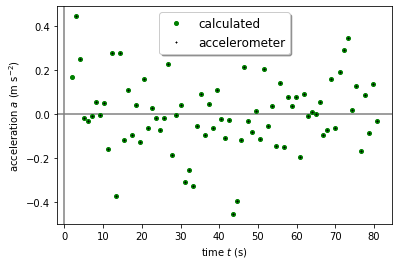

In [145]:
#
accelerometerDataFile='data/Trip02-Acceleration.csv'

# read data from file
t_exp, accel = np.loadtxt(accelerometerDataFile, skiprows=1, unpack = True)


plt.plot(t_double_prime, a, 'o', color='green', markersize = 4, label = 'calculated')
plt.plot(t_exp,accel, '+', color = 'black', markersize = 2, label = 'accelerometer')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('acceleration $a$ (m s$^{-2}$)')
#plt.ylim(-1,1)
plt.legend(loc='upper center', shadow=True, fontsize='large')
plt.draw()
plt.show()